In [1]:
import tensorflow
import matplotlib.pyplot
import numpy
import IPython

print("INFO> TensorFlow version: %s" % tensorflow.__version__)
print("INFO> Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

INFO> TensorFlow version: 1.15.0
INFO> Num GPUs Available:  2


In [2]:
# Key parameters

# Size of the vector holding the information after compression (encoding)
latentSize = 32

# Image size
imageHeight = 28
imageWidth  = 28

nEpochs = 60

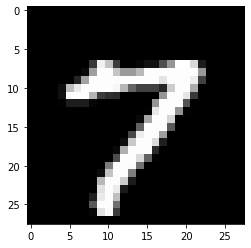

Class of training image #5555 is 7


In [3]:
# Load MNIST dataset
(xTrn, yTrn), (xTst, yTst) = tensorflow.keras.datasets.mnist.load_data()

# Scale all training & test images
xTrn = xTrn / 255.0
xTst = xTst / 255.0

# Verify one image from the training set
myImageIndex = 5555
matplotlib.pyplot.imshow(xTrn[myImageIndex], cmap="gray")
matplotlib.pyplot.show()
print(f"Class of training image #{myImageIndex} is {yTrn[myImageIndex]}")

In [4]:
# Encoder description
myModelInput = tensorflow.keras.layers.Input(shape=(imageHeight,imageWidth))
x = tensorflow.keras.layers.Flatten()(myModelInput)
x = tensorflow.keras.layers.Dense(512)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(256)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(128)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(64)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(latentSize)(x)
latentVector = tensorflow.keras.layers.LeakyReLU()(x) 

# Decoder description
x = tensorflow.keras.layers.Dense(64)(latentVector)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(256)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(512)(x)
x = tensorflow.keras.layers.LeakyReLU()(x)
x = tensorflow.keras.layers.Dropout(0.5)(x) 
x = tensorflow.keras.layers.Dense(784, activation="sigmoid")(x)
myModelOutput = tensorflow.keras.layers.Reshape(target_shape=(imageHeight,imageWidth))(x) 

# Model creation
myModel = tensorflow.keras.models.Model(inputs=myModelInput, outputs=myModelOutput)
myModel.compile(optimizer="nadam",loss="binary_crossentropy")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


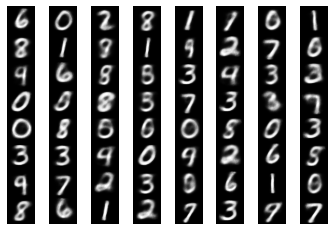

----------- EPOCH 59 -----------
Train on 60000 samples
60000/60000 [==============================] - 19s 315us/sample - loss: 0.1850


In [5]:
# Training section
for epoch in range(nEpochs):
    fig, axs = matplotlib.pyplot.subplots(8, 8)
    rand = xTst[numpy.random.randint(0, 10000, 64)].reshape((8, 8, 1, 28, 28))
    
    IPython.display.clear_output() # If you imported display from IPython
    
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(myModel.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    matplotlib.pyplot.subplots_adjust(wspace = 0, hspace = 0)
    matplotlib.pyplot.show()
    print("-----------", "EPOCH", epoch, "-----------")
    myModel.fit(xTrn, xTrn)